# Neural Network

Our third and last model evaluated in the task of Fetal Health Classification is a Neural Network. We use the TensorFlow library to develop this model.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import CategoricalAccuracy, F1Score, Recall
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
import pyprojroot
import pickle

2024-03-19 21:48:24.750438: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 21:48:24.757440: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 21:48:24.824053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 21:48:26.340620: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


We set a random seed for reproducibility.

In [2]:
RANDOM_STATE = 11

## 1. Data Preprocessing

In [3]:
DATA_PATH = pyprojroot.here().joinpath('data', 'fetal_health.csv')
df = pd.read_csv(DATA_PATH)

In [4]:
df['fetal_health'] = df['fetal_health']-1

In [5]:
# Split data into train, test and validation sets
train, validate, test = np.split(df.sample(frac=1, random_state=RANDOM_STATE), [int(.7*len(df)), int(.8*len(df))])

/home/joselier/miniconda3/envs/capstone-project/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
X_train = train[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_train = train['fetal_health']

X_test = test[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_test = test['fetal_health']

X_val = validate[df.columns.difference(['fetal_health', 'fetal_health_label'])]
y_val = validate['fetal_health']

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [8]:
# One-hot encode our target variable
num_classes = len(df['fetal_health'].unique())
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

## 2. Model Training

In [9]:
model = Sequential()

# layer 1
model.add(Dense(128, 
    kernel_regularizer=regularizers.l2(1e-4),
    input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# layer 2
model.add(Dense(64, 
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
          
# layer 3
model.add(Dense(32, 
                kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
          
# Classification
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

/home/joselier/miniconda3/envs/capstone-project/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,147 (55.26 KB)

 Trainable params: 13,699 (53.51 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=[
                 CategoricalAccuracy(),
                 Recall(name='balanced_accuracy'),
                 Recall(class_id=2, name='recall_2'),
                 F1Score(average='macro')
             ])

In [11]:
MODEL_PATH = pyprojroot.here().joinpath('models', 'neural_net.keras')

# Defining our callbacks
checkpoint = ModelCheckpoint(MODEL_PATH, 
                             verbose=1,
                            save_best_only=True,
                            monitor='val_recall_2',
                            mode='max')

In [12]:
hist = model.fit(X_train_scaled, y_train,
                callbacks=[checkpoint],
                epochs=120,
                validation_data=(X_val_scaled, y_val))

Epoch 1/120


40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - balanced_accuracy: 0.4301 - categorical_accuracy: 0.4838 - f1_score: 0.3967 - loss: 1.3686 - recall_2: 0.5455
Epoch 1: val_recall_2 improved from -inf to 0.30435, saving model to /home/joselier/capstone-fuse.ai/models/neural_net.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - balanced_accuracy: 0.4474 - categorical_accuracy: 0.5016 - f1_score: 0.4111 - loss: 1.3236 - recall_2: 0.5533 - val_balanced_accuracy: 0.4575 - val_categorical_accuracy: 0.8208 - val_f1_score: 0.6907 - val_loss: 0.8101 - val_recall_2: 0.3043
Epoch 2/120
40/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - balanced_accuracy: 0.7235 - categorical_accuracy: 0.7716 - f1_score: 0.6401 - loss: 0.7073 - recall_2: 0.6820
Epoch 2: val_recall_2 improved from 0.30435 to 0.47826, saving model to /home/joselier/capstone-fuse.ai/models/neural_net.keras
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - balanced_accuracy: 0.7274 - categorical_accuracy: 0.7747 - f1_score: 0.6451 - loss: 0.6991 - recall_2: 0.692

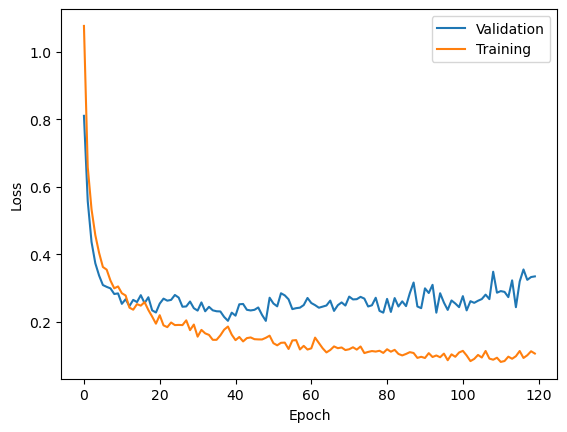

In [13]:
fig, ax = plt.subplots(1, 1)

train_val = hist.history['val_loss']
ax.plot(range(len(train_val)), hist.history['val_loss'])
ax.plot(range(len(train_val)), hist.history['loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Validation', 'Training'], loc='best')

plt.show()

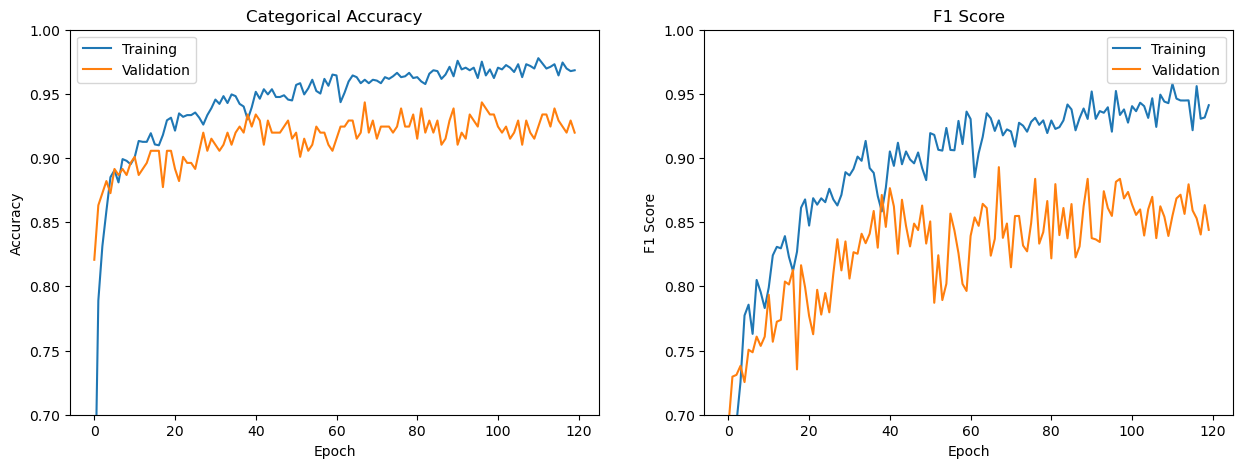

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

train_val = hist.history['val_f1_score']
ax[0].set_ylim([0.7,1])
ax[0].plot(range(len(train_val)), hist.history['categorical_accuracy'])
ax[0].plot(range(len(train_val)), hist.history['val_categorical_accuracy'])
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Categorical Accuracy')
ax[0].legend(['Training', 'Validation'], loc='best')

ax[1].set_ylim([0.7,1])
ax[1].plot(range(len(train_val)), hist.history['f1_score'])
ax[1].plot(range(len(train_val)), hist.history['val_f1_score'])
ax[1].set_ylabel('F1 Score')
ax[1].set_xlabel('Epoch')
ax[1].set_title('F1 Score')
ax[1].legend(['Training', 'Validation'], loc='best')

plt.show()

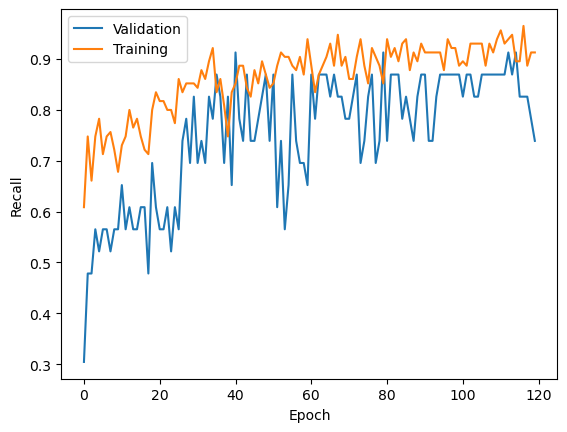

In [15]:
fig, ax = plt.subplots(1, 1)

train_val = hist.history['val_f1_score']
ax.plot(range(len(train_val)), hist.history['val_recall_2'])
ax.plot(range(len(train_val)), hist.history['recall_2'])
ax.set_ylabel('Recall')
ax.set_xlabel('Epoch')
ax.legend(['Validation', 'Training'], loc='best')

plt.show()

## 3. Evaluation

In [16]:
best_nn = load_model(MODEL_PATH)

In [17]:
best_nn.evaluate(X_test_scaled, y_test, return_dict=True)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - balanced_accuracy: 0.9211 - categorical_accuracy: 0.9281 - f1_score: 0.8717 - loss: 0.2069 - recall_2: 0.9408


{'balanced_accuracy': 0.922535240650177,
 'categorical_accuracy': 0.9248826503753662,
 'f1_score': 0.8515806794166565,
 'loss': 0.19217978417873383,
 'recall_2': 0.8947368264198303}